In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import os

# Datasets

In [27]:
df_genres = pd.read_csv('../igdb_scarper/genres.csv')

df_platforms = pd.read_csv('../platforms.csv', header=None)
df_platforms.columns = ['platform_id', 'platform_name']


list_platform_ps = ['PlayStation 4', 'PlayStation 3', 'PlayStation 2', 'PlayStation', 'PlayStation Vita', 'PlayStation Portable']
list_platform_xbox = ['Xbox One', 'Xbox 360', 'Xbox', 'Xbox Live Arcade']
list_platform_pc = ['PC (Microsoft Windows)', 'PC DOS', 'Mac', 'Linux']


In [15]:
if os.path.exists('dataset.csv'):
    dataset = pd.read_csv('dataset.csv', lineterminator='\n')

else:

    PATH = '../igdb_scarper/IGDB_metadata/'

    dataset = pd.DataFrame()
    for platform in os.listdir(PATH):
        print(platform)

        df_platform = pd.DataFrame()
        
        for file in os.listdir(PATH + platform):

            # print(PATH + platform + '/' + file)

            # check if file is empty
            # if os.path.isfile(PATH + platform + '/' + file) and os.path.getsize(PATH + platform + '/' + file) > 0:
                
            try:
                df_platform = pd.read_csv(PATH + platform + '/' + file)
                dataset = pd.concat([dataset, df_platform])
            except pd.errors.EmptyDataError:
                print(file, " is empty and has been skipped.")    
            
            

            
            # else:
            #     print('File is empty')

    dataset['first_release_date'] = pd.to_datetime(dataset['first_release_date'], unit='s')

    dataset['platforms'] = dataset['platforms'].str.replace('[', '')
    dataset['platforms'] = dataset['platforms'].str.replace(']', '')
    dataset['platforms'] = dataset['platforms'].str.split(',')
    dataset['platforms'] = dataset['platforms'].apply(lambda x: [i.strip() for i in x])

    # dataset['genres'] = dataset['genres'].str.replace('[', '')
    # dataset['genres'] = dataset['genres'].str.replace(']', '')
    # dataset['genres'] = dataset['genres'].str.split(',')
    # dataset['genres'] = dataset['genres'].apply(lambda x: [i.strip() for i in x])

    dataset.to_csv('dataset.csv', index=False, encoding='utf-8', lineterminator='\n')



PC
Xbox
Xbox_games_rating_between_954561600_957067200.csv  is empty and has been skipped.
Xbox_games_rating_between_744177600_746769600.csv  is empty and has been skipped.
Xbox_games_rating_between_830923200_833515200.csv  is empty and has been skipped.
Xbox_games_rating_between_825656400_828244800.csv  is empty and has been skipped.
Xbox_games_rating_between_770443200_772948800.csv  is empty and has been skipped.
Xbox_games_rating_between_862459200_865051200.csv  is empty and has been skipped.
Xbox_games_rating_between_736228800_738820800.csv  is empty and has been skipped.
Xbox_games_rating_between_970372800_972964800.csv  is empty and has been skipped.
Xbox_games_rating_between_878356800_880866000.csv  is empty and has been skipped.
Xbox_games_rating_between_965102400_967694400.csv  is empty and has been skipped.
Xbox_games_rating_between_817794000_820386000.csv  is empty and has been skipped.
Xbox_games_rating_between_901944000_904536000.csv  is empty and has been skipped.
Xbox_gam

In [16]:
dataset.head()

len(dataset)

129380

In [94]:

# only platforms containing 6
dataset[dataset['platforms'].apply(lambda x: '6' in x)]

# show platform id and number of games for each
dataset['platforms'].apply(lambda x: len(x)).value_counts()

# count the number of games for each the platform that cotains the id 6
dataset['platforms'].apply(lambda x: '6' in x).value_counts()


,id,count,name
0,6,79196,PC (Microsoft Windows)
1,48,5001,PlayStation 4
2,130,4722,Nintendo Switch
3,8,2506,PlayStation 2
4,20,2211,Nintendo DS


# Games per platform

In [32]:
# number of games per platform
games_per_platform = dataset['platforms'].apply(lambda x: x[0]).value_counts().sort_values(ascending=False)

games_per_platform = pd.DataFrame(games_per_platform).reset_index().rename(columns={'platforms': 'platform_id'})
games_per_platform['platform_id'] = games_per_platform['platform_id'].astype(int)
games_per_platform = games_per_platform.merge(df_platforms, on='platform_id', how='left')
games_per_platform.sort_values(by='count', ascending=False)

# games_per_platform['count'].sum()


,platform_id,count,platform_name
0,6,84561,PC (Microsoft Windows)
1,3,13267,Linux
2,48,5006,PlayStation 4
3,130,4722,Nintendo Switch
4,8,3345,PlayStation 2
5,7,2290,PlayStation
6,20,2213,Nintendo DS
7,9,2130,PlayStation 3
8,5,1918,Wii
9,49,1727,Xbox One


In [34]:
# games_per_platform where platform is NaN
games_per_platform[games_per_platform['platform_name'].isna()]

,platform_id,count,platform_name


In [139]:
dataset[dataset['platforms'].apply(lambda x: '5' in x)]

,first_release_date,id,name,platforms,summary,genres,storyline,rating,single_platform
32,2010-07-12,51045,City Builder,"[5, 6]",Solve pipe puzzles in time to build cities in ...,"[9, 13, 15, 33]",Missing,Missing,False
33,2010-07-22,51039,Calvin Tucker's Redneck: Farm Animals Racing T...,"[5, 6, 20]",Calvin Tuckers Redneck Farm Animal Racing Tour...,[10],Missing,Missing,False
42,2010-07-08,4883,The Garfield Show: Threat of the Space Lasagna,"[5, 6]",The Garfield Show Threat of the Space Lasagna...,[Missing],Missing,Missing,False
56,2011-09-02,554,Driver: San Francisco,"[5, 6, 9, 12, 14]",The game takes place a few months after the ev...,[10],Missing,75.27996811222204,False
39,2007-09-17,5125,Rock 'n' Roll Adventures,"[5, 6, 8]",Bash and trash crazed instruments with Elvizs ...,[8],Missing,Missing,False
...,...,...,...,...,...,...,...,...,...
32,2009-03-25,6572,Backyard Baseball '10,"[5, 8, 20]",Combining all the elements of a realistic spor...,[14],Missing,Missing,False
33,2009-03-03,4990,Major League Baseball 2K9,"[5, 6, 8, 9, 12, 38]",Major League Baseball 2K9 or in short MLB 2K9 ...,[14],Missing,Missing,False
36,2009-03-29,2674,Guitar Hero: Metallica,"[5, 8, 9, 12]",Guitar Hero Metallica is a music rhythm game d...,[7],Missing,78.72452749490859,False
38,2009-03-06,5158,Ski-Doo: Snowmobile Challenge,"[5, 9, 12]",SkiDoo Snowmobile Challenge is a snowmobile ra...,"[10, 14]",Missing,75.0,False


# Single platform games

In [132]:
# only single platform games
dataset[dataset['platforms'].apply(lambda x: len(x) == 1)]

# show only the single platform games in their respective platform
games_single_platform = dataset[dataset['platforms'].apply(lambda x: len(x) == 1)]['platforms'].apply(lambda x: x[0]).value_counts()

games_single_platform = pd.DataFrame(games_single_platform).reset_index().rename(columns={'platforms': 'id'})
games_single_platform['id'] = games_single_platform['id'].astype(int)
games_single_platform = games_single_platform.merge(df_platforms, on='id', how='left')
games_single_platform.sort_values(by='count', ascending=False)

# games_single_platform['count'].sum()

,id,count,name
0,6,40372,PC (Microsoft Windows)
1,130,4596,Nintendo Switch
2,20,1976,Nintendo DS
3,8,1316,PlayStation 2
4,37,1174,Nintendo 3DS
5,38,1133,PlayStation Portable
6,48,833,PlayStation 4
7,49,745,Xbox One
8,9,639,PlayStation 3
9,12,625,Xbox 360


# Games per Year

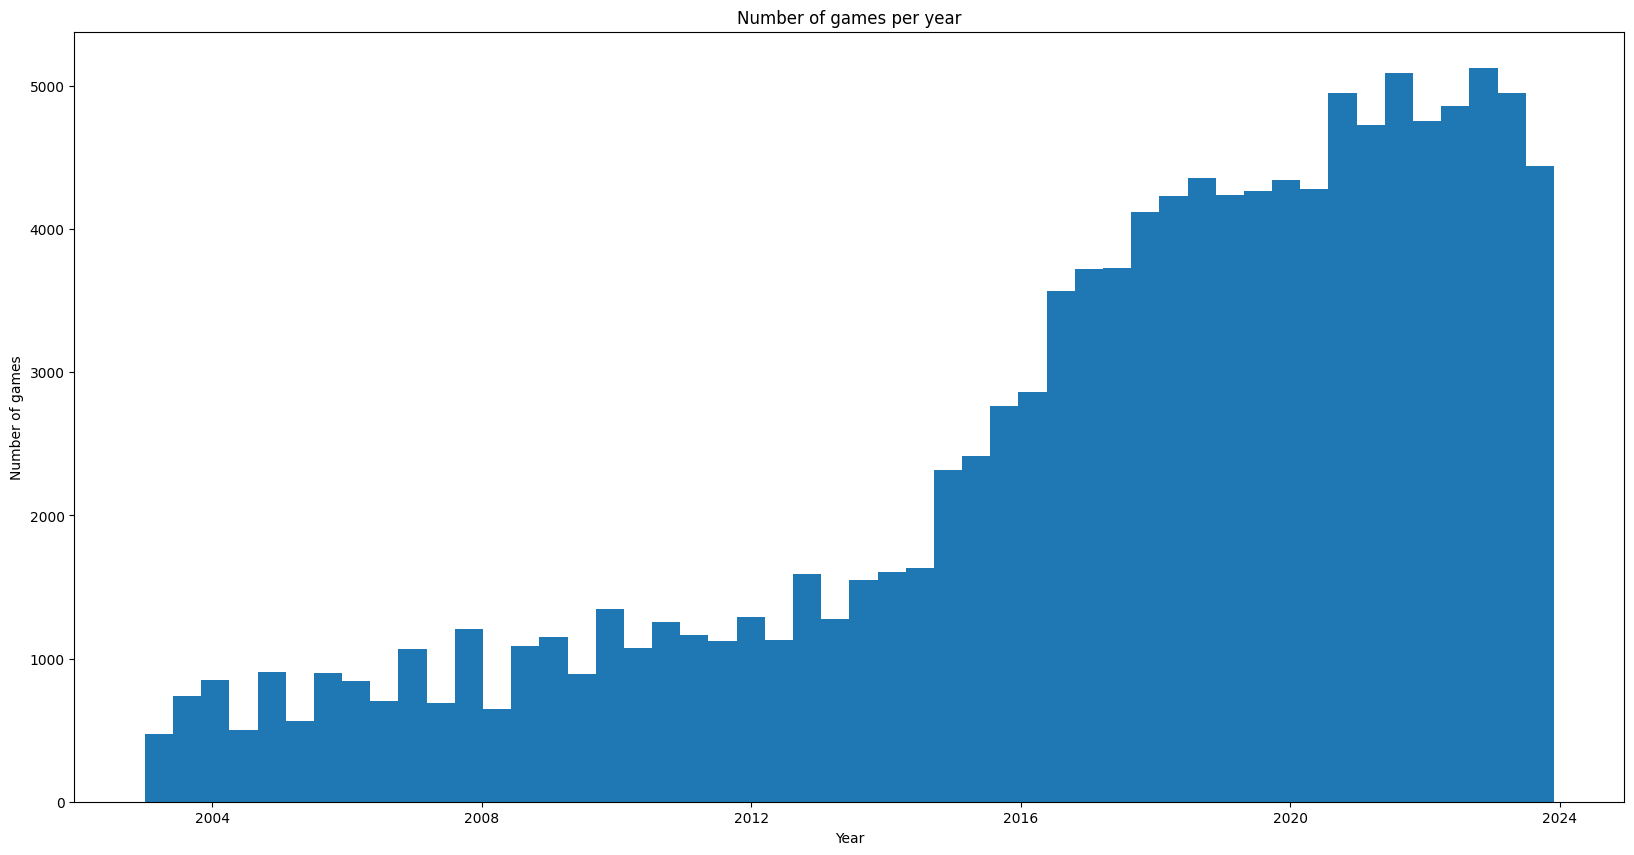

KeyboardInterrupt: 

In [54]:
# plot the games per year
plt.figure(figsize=(20,10))
plt.hist(dataset['first_release_date'], bins=50)
plt.xlabel('Year')
plt.ylabel('Number of games')
plt.title('Number of games per year')
plt.show()

# plot games per platform
plt.figure(figsize=(20,10))
plt.hist(dataset['platforms'], bins=50)
plt.xlabel('Platform')
plt.ylabel('Number of games')
plt.title('Number of games per platform')
plt.show()

